In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
WORLD_PATH='/content/world_yandex.csv'
RUSSIA_PATH='/content/covid_russia_yandex.csv'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
data = pd.read_csv(WORLD_PATH, sep=';')

In [4]:
feature_dict = {"Страна":"Country", "Дата":"Date", "Заражений":"Confirmed", "Выздоровлений": "Recovered", "Смертей":"Deaths", "Заражений за день":"Confirmed_day","Выздоровлений за день":"Recovered_day", "Смертей за день":"Deaths_day"}
data.rename(columns=feature_dict, inplace = True)
data["Date"]=pd.to_datetime(data["Date"], format="%d.%m.%Y")
datewise=data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()
train_ml=datewise.iloc[:int(datewise.shape[0])]
len(train_ml)

101

# График подтвержденных случаев по миру

In [0]:
def confirmed_world(datewise, figsize, dpi, SAVE_PATH):
  plt.figure(figsize=(12,6), dpi=300);
  plot_ = sns.barplot(x=datewise.index.strftime('%d-%m-%Y'), y=datewise["Confirmed"]);
  for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 5 == 0:  # every n-th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

  plt.title("Количество заболевших по миру");
  plt.xlabel("Дата")
  plt.ylabel("Кол-во заболевших")
  plt.grid();
  plt.xticks(rotation=30);
  plt.savefig(SAVE_PATH + 'confirmed_world.png');

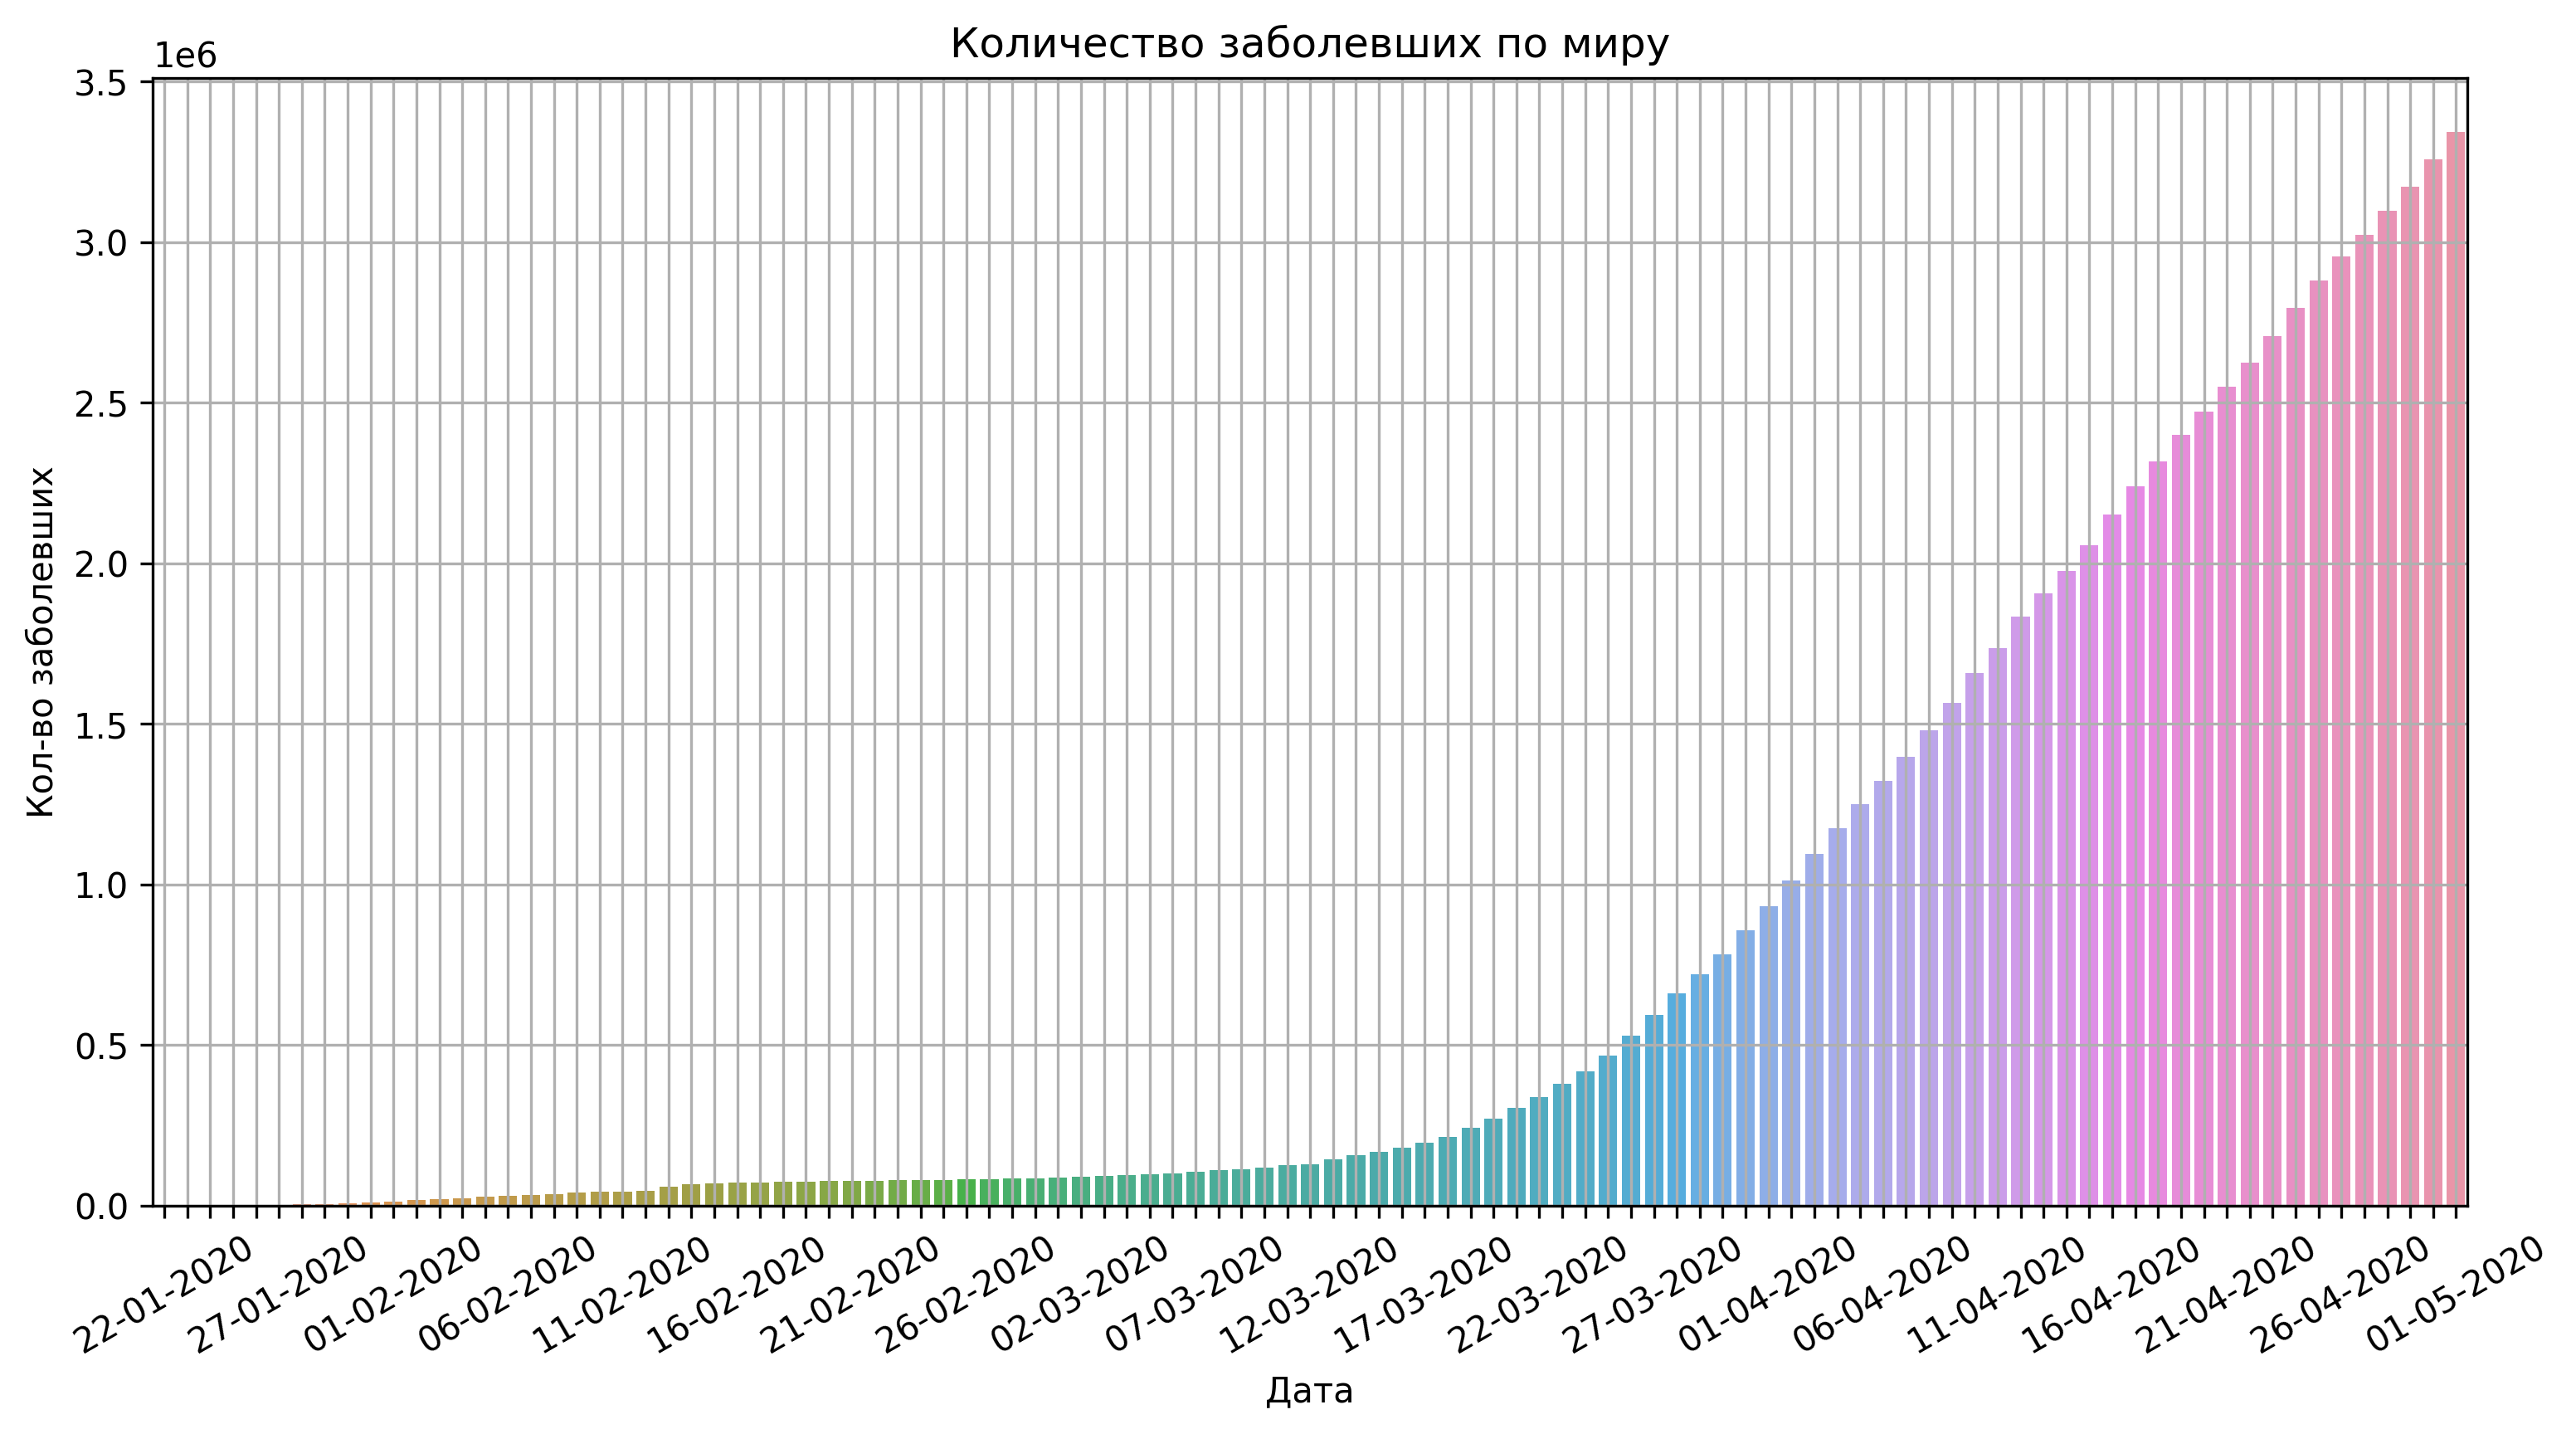

In [7]:
confirmed_world(datewise, (7,5),100, '/content/')

# Статистики по миру

In [0]:
def daily_stats_world(datewise, figsize, dpi, SAVE_PATH):
  plt.figure(figsize=(8,6), dpi=300);
  plt.plot(datewise["Confirmed"].diff().fillna(0),label="Ежедневное кол-во заболевших",linewidth=3);
  plt.plot(datewise["Recovered"].diff().fillna(0),label="Ежедневное кол-во выздоровевших",linewidth=3);
  plt.plot(datewise["Deaths"].diff().fillna(0),label="Ежедневное кол-во смертей",linewidth=3);
  plt.xlabel("Дата");
  plt.ylabel("Ежедневный прирост");
  plt.title("Ежедневная статистика по миру");
  plt.xticks(rotation=-30);
  plt.grid();
  plt.legend();
  plt.savefig(SAVE_PATH + 'daily_stats_world.png');

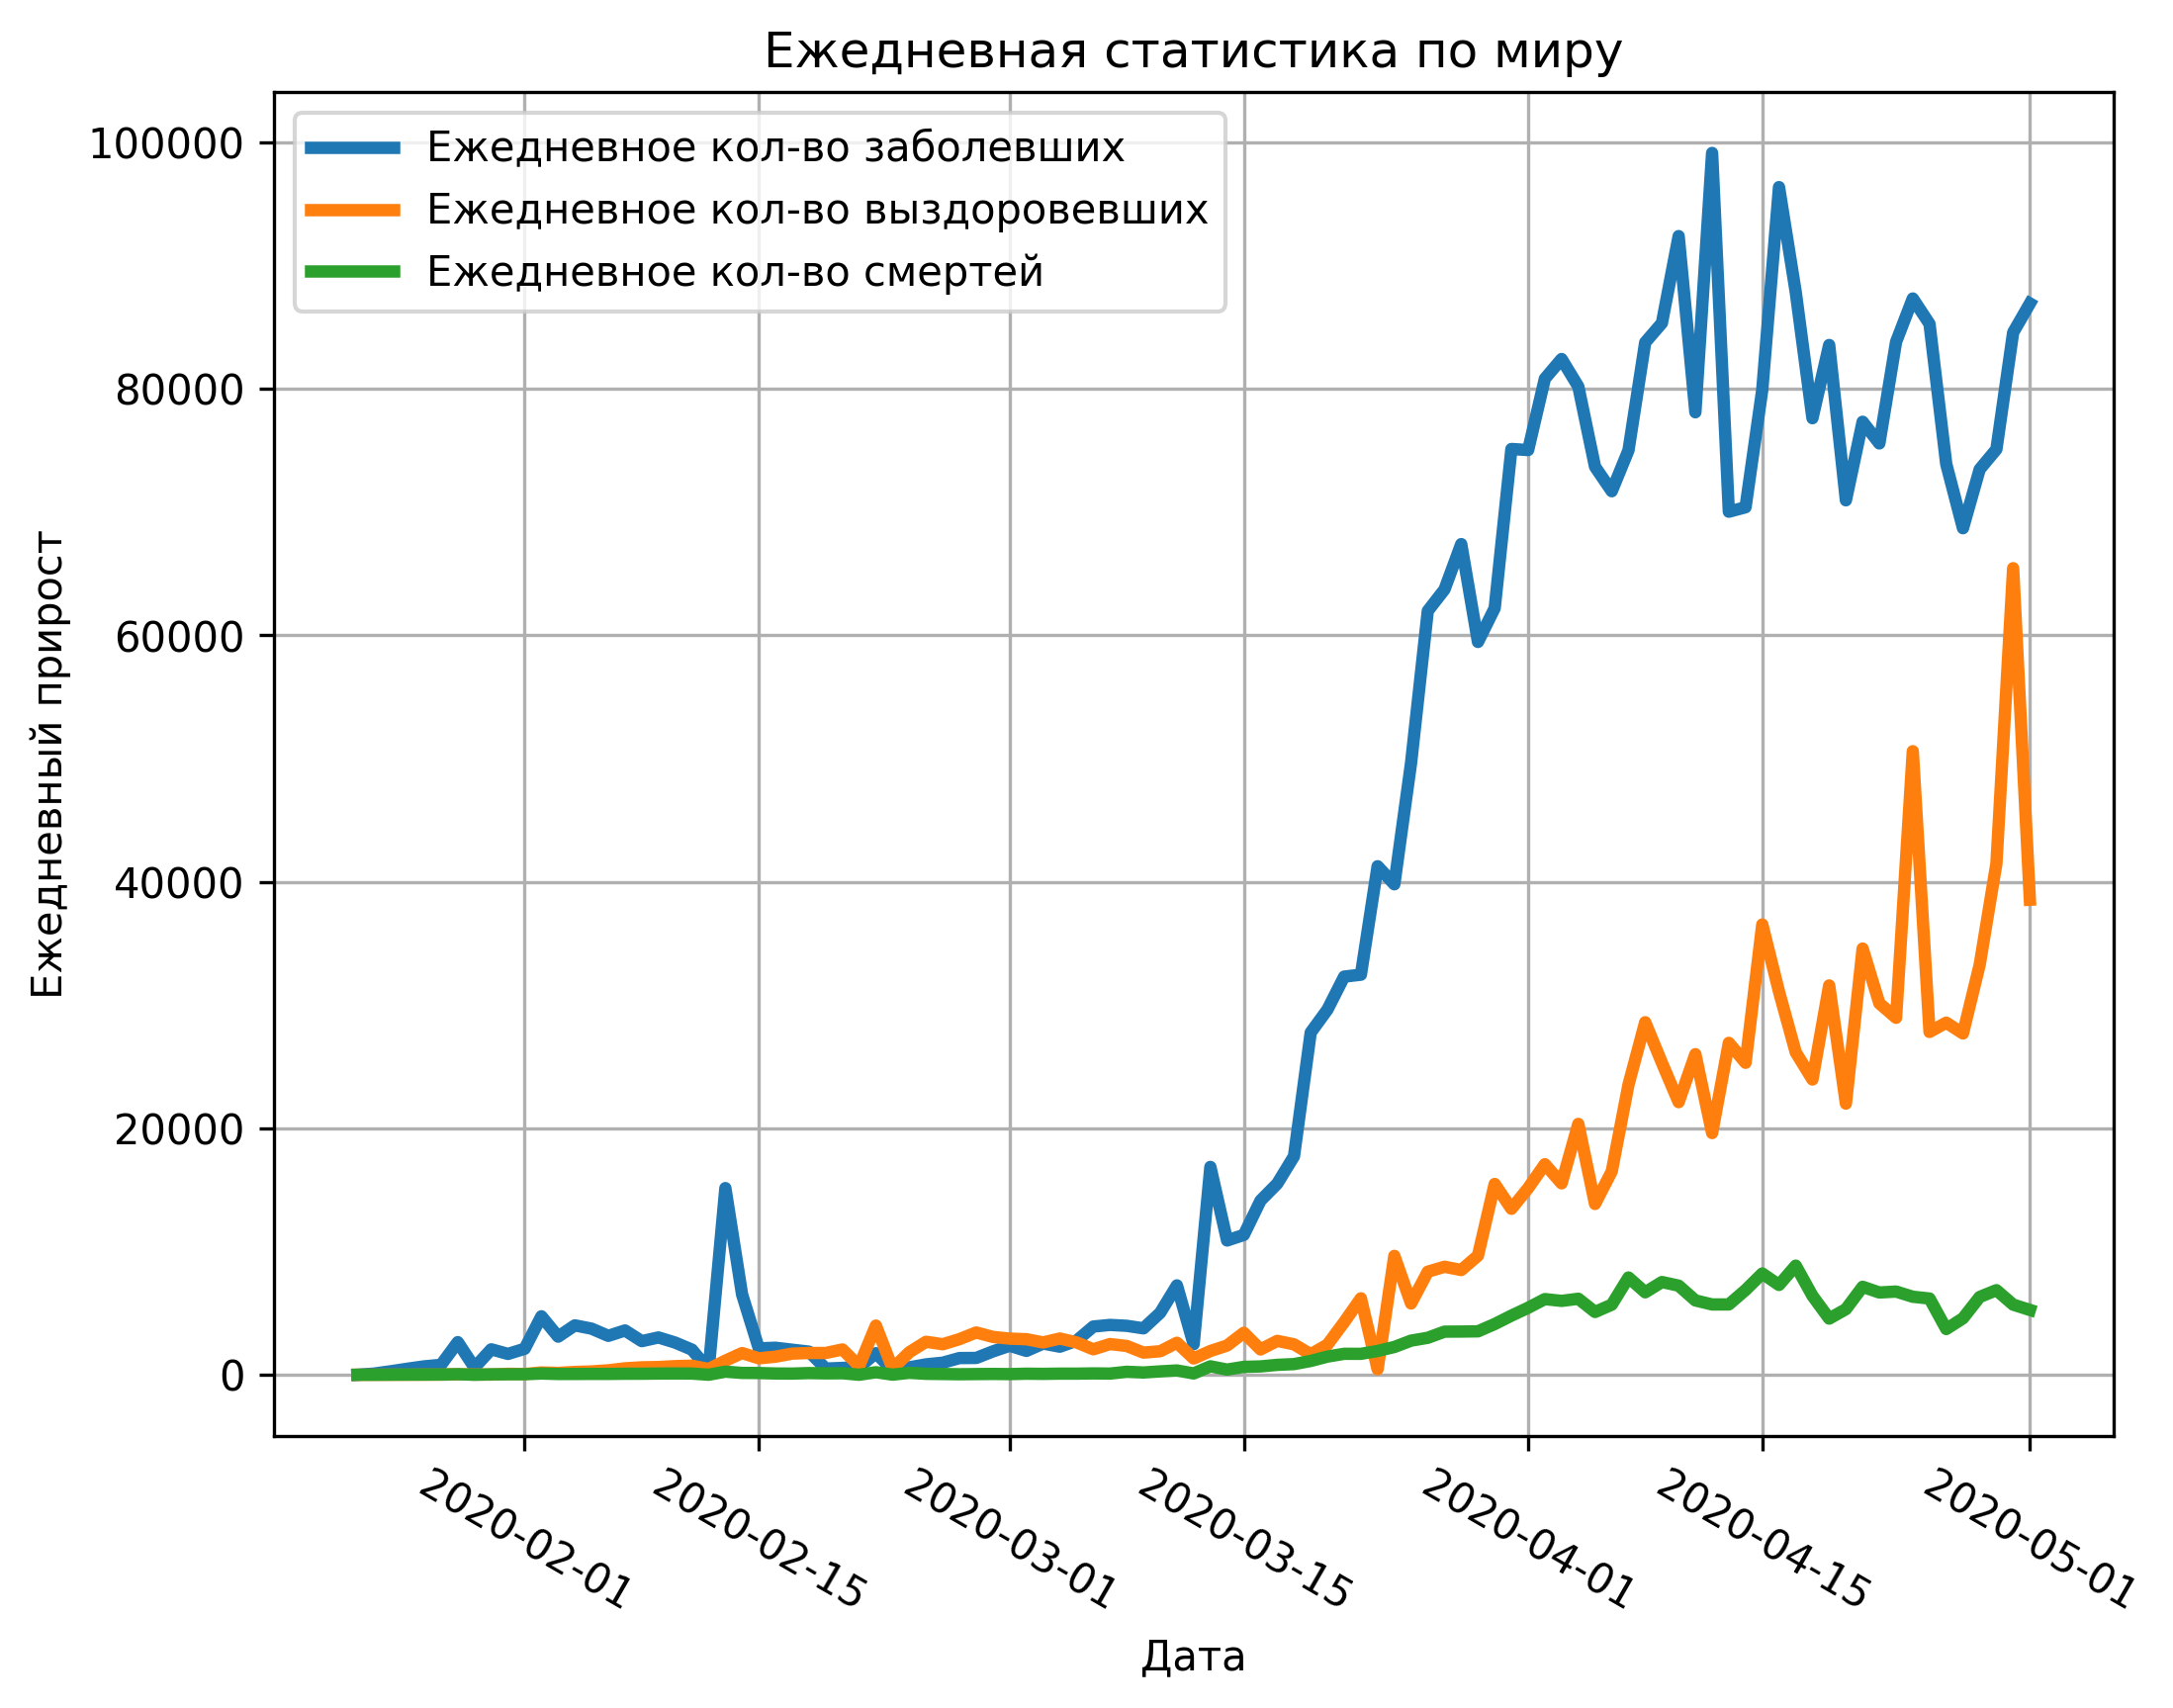

In [9]:
daily_stats_world(datewise, (6,5), 100, '/content/')

# Статистика по неделям по миру

In [0]:
def weekly_stats_world(datewise, figsize, dpi, SAVE_PATH):
    datewise["WeekOfYear"]=datewise.index.weekofyear

    week_num=[]
    weekwise_confirmed=[]
    weekwise_recovered=[]
    weekwise_deaths=[]
    w=1
    for i in list(datewise["WeekOfYear"].unique()):
        weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
        weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
        weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
        week_num.append(w)
        w=w+1

    plt.figure(figsize=(12,6), dpi=300);

    plt.plot(week_num,weekwise_confirmed,linewidth=3, label='Кол-во заболевших');
    plt.plot(week_num,weekwise_recovered,linewidth=3, label='Кол-во вылечившихся');
    plt.plot(week_num,weekwise_deaths,linewidth=3, label = 'Кол-во умерших');
    plt.ylabel("Кол-во заболевших");
    plt.xlabel("Недели от начала эпидемии");
    plt.title("Недельный показатель различных кейсов");
    plt.grid();
    plt.legend();
    plt.savefig(SAVE_PATH + 'weekly_stats_world.png')

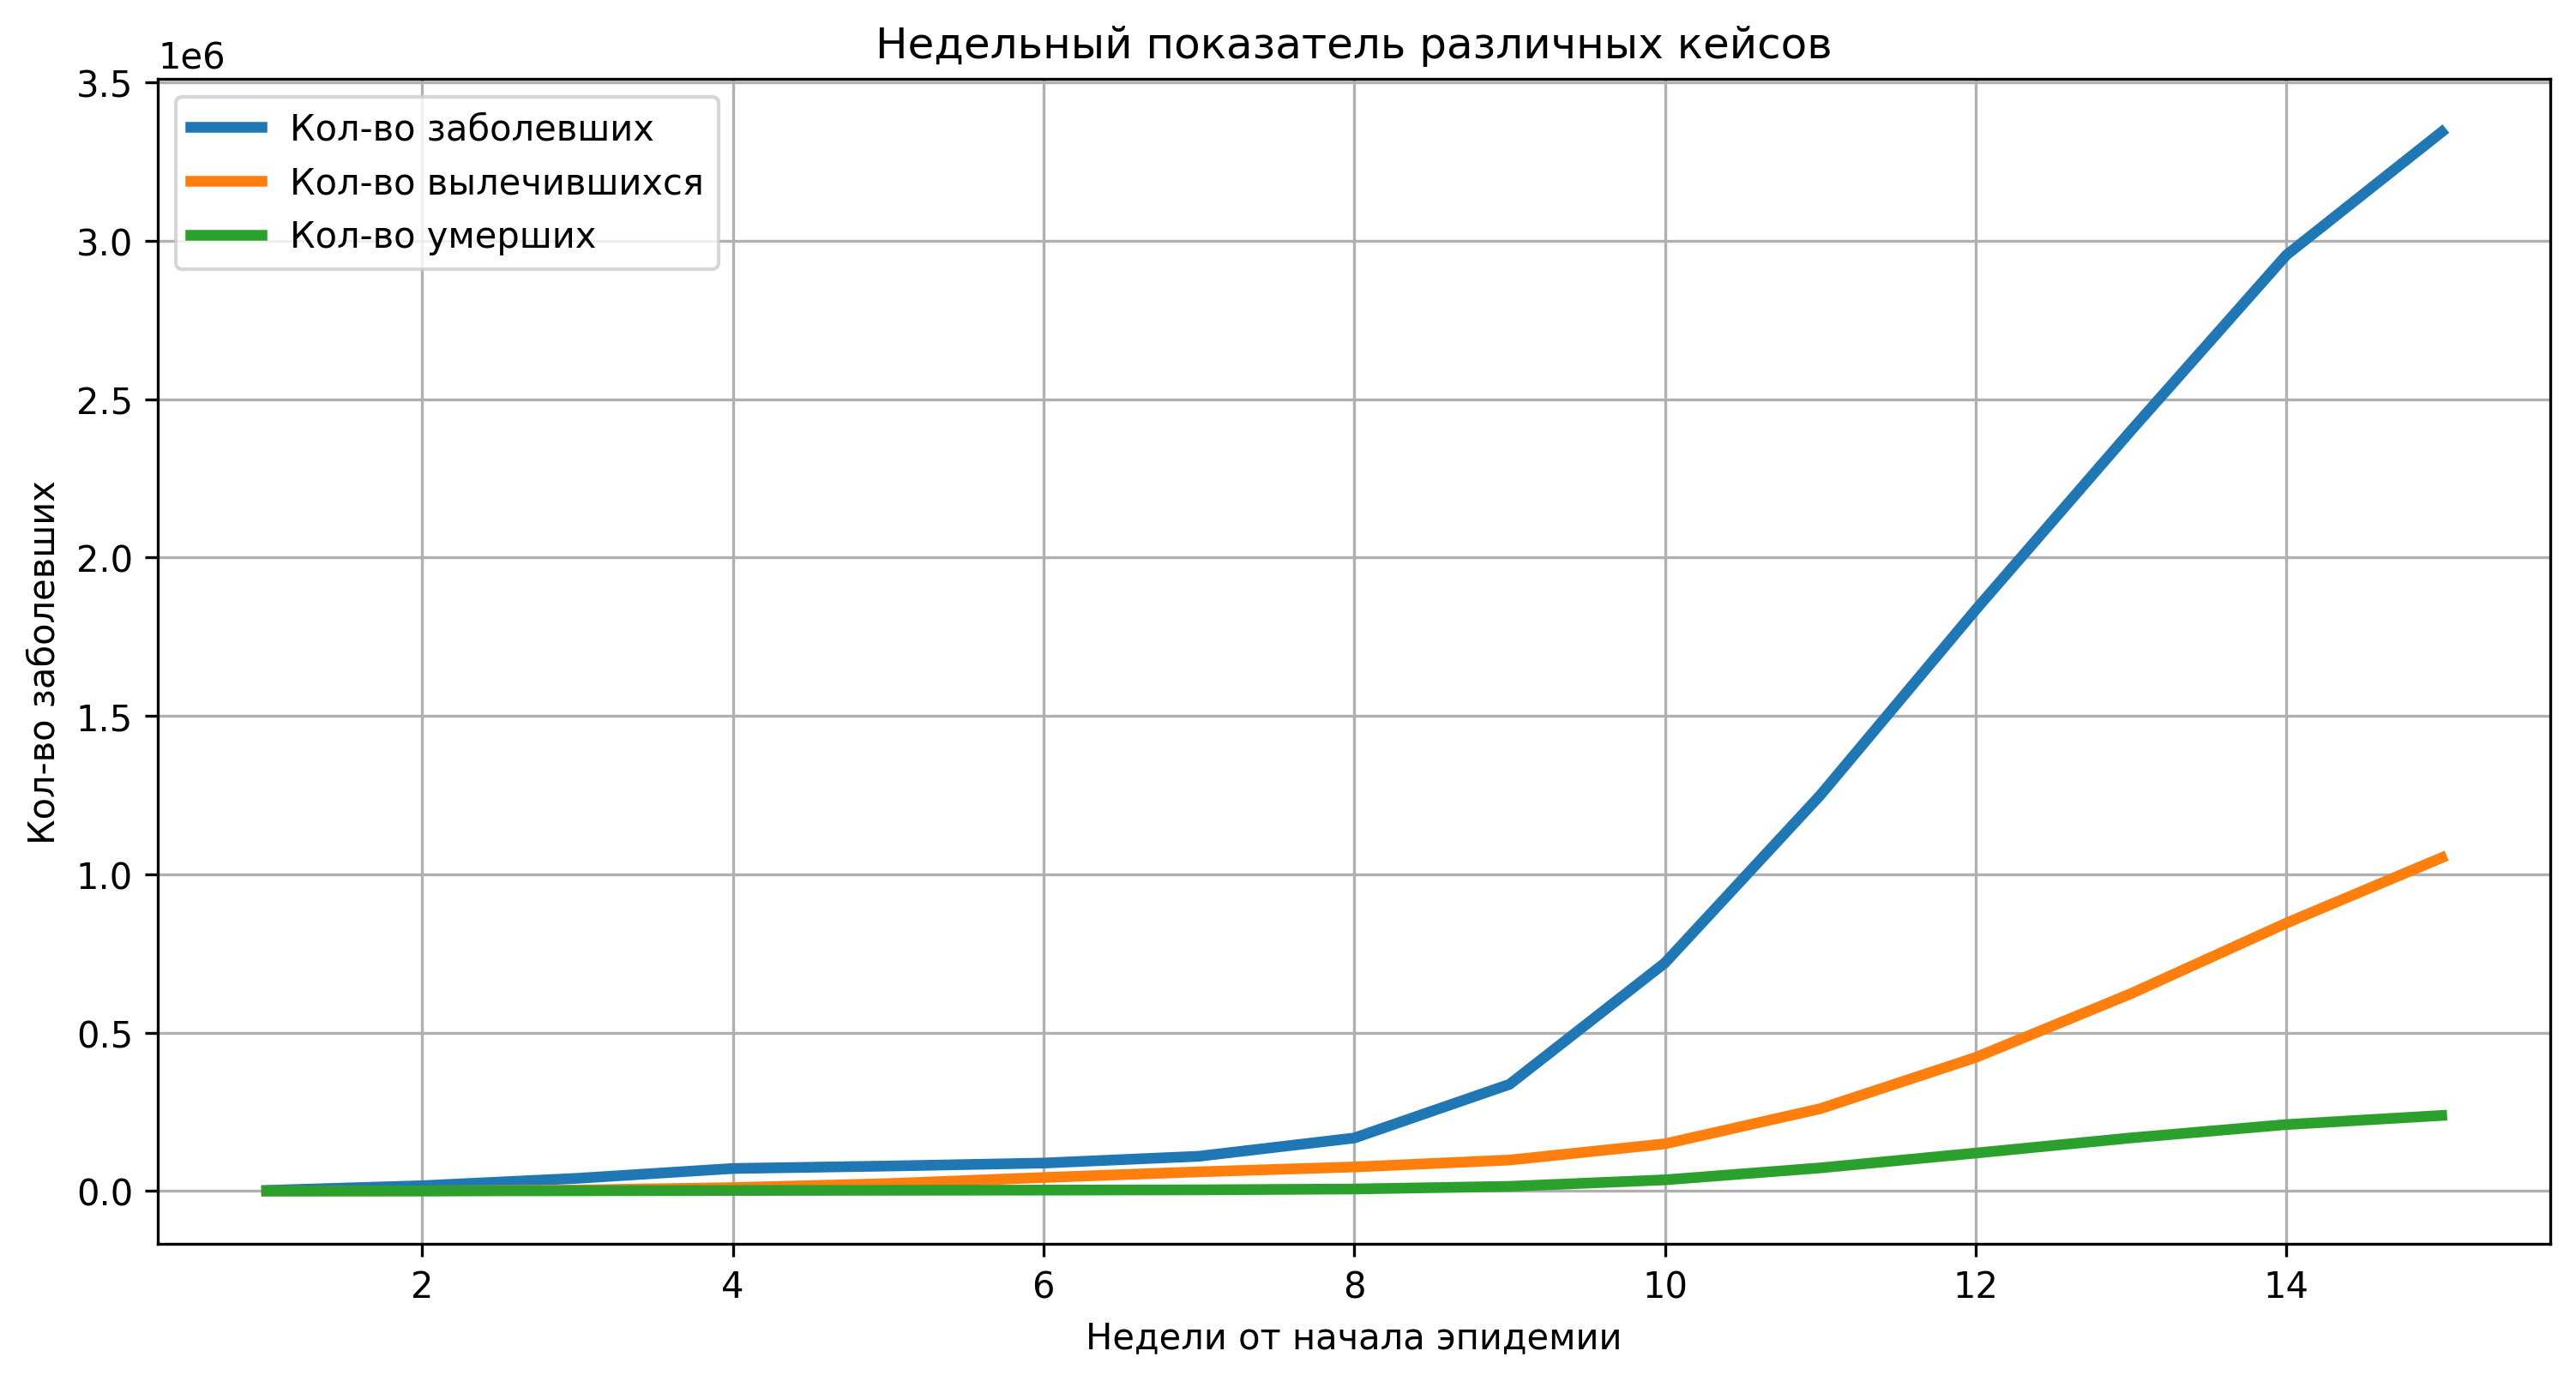

In [11]:
weekly_stats_world(datewise, (6,5), 100, '/content/')

#Прогнозирование по миру

In [0]:
def forecast(datewise, figsize, dpi, SAVE_PATH, days=1): # в SAVE_PATH передавать путь + название сохраняемого графика
  prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
  prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y']) 
  prophet_c.fit(prophet_confirmed)
  forecast_c=prophet_c.make_future_dataframe(periods=days)
  forecast_confirmed=forecast_c.copy()
  confirmed_forecast=prophet_c.predict(forecast_c)
  plt.figure(figsize=figsize, dpi = dpi);
  print(prophet_c.plot(confirmed_forecast, xlabel='Дата', ylabel = 'Кол-во заболевших').savefig(SAVE_PATH))
  
  

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


None


<Figure size 700x500 with 0 Axes>

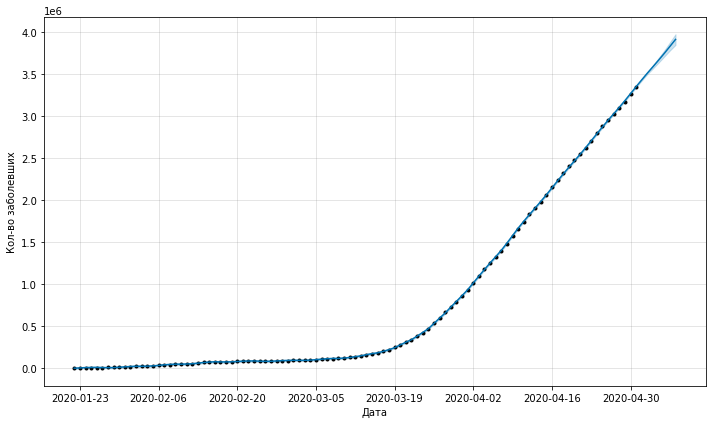

In [13]:
forecast(datewise, (7,5), 100, SAVE_PATH='/content/lol.png', days = 7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


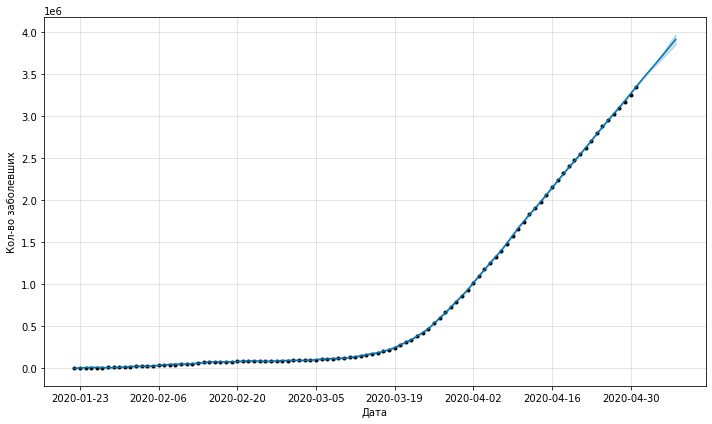

In [14]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])
prophet_c.fit(prophet_confirmed)
forecast_c=prophet_c.make_future_dataframe(periods=7)
forecast_confirmed=forecast_c.copy()
confirmed_forecast=prophet_c.predict(forecast_c)
plot = prophet_c.plot(confirmed_forecast, xlabel='Дата', ylabel = 'Кол-во заболевших')
#axes = plot.get_axes()
#axes[0].set_xlabel("LOL")
#axes[0].set_xlabel

In [0]:
def predict():
    dt = pd.DataFrame({'ds':[pd.to_datetime('today') + timedelta(days=1)]})
    pred = prophet_c.predict(dt)
    pred = (pred['yhat'].values)[0]
    s = 0 * pred
    return "%d" % pred

In [16]:
predict()

'3653937'

# Пронозирование по регионам России

In [17]:
reg_data = pd.read_csv(RUSSIA_PATH, sep = ';')
feature_dict_reg = {"Регион":"Region", "Дата":"Date", "Заражений":"Confirmed", "Выздоровлений": "Recovered", "Смертей":"Deaths", "Заражений за день":"Confirmed_day","Выздоровлений за день":"Recovered_day", "Смертей за день":"Deaths_day"}
reg_data.rename(columns=feature_dict_reg, inplace = True)
reg_data.Date = pd.to_datetime(reg_data.Date, format="%d.%m.%Y")

def region_data(reg_data, region):
  tamb_data = reg_data[reg_data.Region==region]
  tamb_data=tamb_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
  return tamb_data

tamb_data = region_data(reg_data, 'Тамбовская обл.')
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True)
prophet_confirmed = pd.DataFrame(zip(list(tamb_data.index),list(tamb_data["Confirmed"])),columns=['ds','y'])
prophet_c.fit(prophet_confirmed)
forecast_c=prophet_c.make_future_dataframe(periods=3)
forecast_confirmed=forecast_c.copy()
pred_date = pd.DataFrame({'ds':[pd.to_datetime("2020-05-03")]})
confirmed_forecast=prophet_c.predict(pred_date)
confirmed_forecast['yhat'][0]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


483.23944571323153

#Прогнозирование по России

In [18]:
russia_data = pd.read_csv(RUSSIA_PATH, sep=';')
feature_dict_russia = {"Регион":'Region',"Страна":"Country", "Дата":"Date", "Заражений":"Confirmed", "Выздоровлений": "Recovered", "Смертей":"Deaths", "Заражений за день":"Confirmed_day","Выздоровлений за день":"Recovered_day", "Смертей за день":"Deaths_day"}
russia_data.rename(columns=feature_dict_russia, inplace = True)
russia_data["Date"]=pd.to_datetime(russia_data["Date"], format="%d.%m.%Y")
datewise=russia_data.groupby(['Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum', 'Confirmed_day':'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed_day"])),columns=['ds','y'])
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
predict()

'8884'

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

WORLD_PATH='/content/Таблица_2020-05-03_08-45.csv'
RUSSIA_PATH='/content/_Таблица_2020-05-03_16-50.csv'

class CovidAnal:
    '''
    Complete API for analyzing, predicting and visualizing the situation with coronovirus
    '''

    def __init__(self, wrldpath, rupath):
        self.feature_dict = {'world':{"Страна":"Country", "Дата":"Date", "Заражений":"Confirmed", "Выздоровлений": "Recovered", "Смертей":"Deaths", "Заражений за день":"Confirmed_day","Выздоровлений за день":"Recovered_day", "Смертей за день":"Deaths_day"},
                             'ru':{"Регион":"Region", "Дата":"Date", "Заражений":"Confirmed", "Выздоровлений": "Recovered", "Смертей":"Deaths", "Заражений за день":"Confirmed_day","Выздоровлений за день":"Recovered_day", "Смертей за день":"Deaths_day"}
                             }
        self.world_data = self.get_world_data(wrldpath, 'world')
        self.ru_data = self.get_world_data(rupath, 'ru')
        

    def get_world_data(self, path, mode):
        '''
        Preprocess and return data

          -  mode : world, ru
        '''
        data = pd.read_csv(path, sep=';')
        data.rename(columns=self.feature_dict[mode], inplace = True)
        data["Date"]=pd.to_datetime(data["Date"], format="%d.%m.%Y")
        return data


    def predict_world(self, target='Confirmed'):
        '''
        Predict number of confirmed cases in world

          -  target : Confirmed, Recovered, Deaths
        '''
        datewise=self.world_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
        datewise["Days Since"]=datewise.index-datewise.index.min()

        prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
        prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise[target])),columns=['ds','y'])
        prophet_c.fit(prophet_confirmed)

        dt = pd.DataFrame({'ds':[pd.to_datetime('today') + timedelta(days=1)]})
        pred = prophet_c.predict(dt)
        pred_down = (pred['yhat_lower'].values)[0]
        pred_top = (pred['yhat_upper'].values)[0]
        
        return "(%d, %d)" % (pred_down, pred_top)
    

    def predict_russia(self, target='Confirmed_day'):
        '''
        Predict number of confirmed cases in world

          -  target : Confirmed, Recovered, Deaths, Confirmed_day
        '''
        datewise=self.ru_data.groupby(['Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum', 'Confirmed_day':'sum'})
        datewise["Days Since"]=datewise.index-datewise.index.min()

        prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
        prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise[target])),columns=['ds','y'])
        prophet_c.fit(prophet_confirmed)

        dt = pd.DataFrame({'ds':[pd.to_datetime('today') + timedelta(days=1)]})
        pred = prophet_c.predict(dt)
        pred_down = (pred['yhat_lower'].values)[0]
        pred_top = (pred['yhat_upper'].values)[0]
        
        return "(%d, %d)" % (pred_down, pred_top)


    def predict_reg(self, region, target='Confirmed'):
        '''
        Predict number of confirmed cases in russian region

          -  target : Confirmed, Recovered, Deaths, Confirmed_day
        '''
        tamb_data = self.ru_data[ru_data.Region==region]
        tamb_data=tamb_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

        prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True)
        prophet_confirmed = pd.DataFrame(zip(list(tamb_data.index),list(tamb_data[target])),columns=['ds','y'])
        prophet_c.fit(prophet_confirmed)

        dt = pd.DataFrame({'ds':[pd.to_datetime('today') + timedelta(days=1)]})
        pred = prophet_c.predict(dt)
        pred_down = (pred['yhat_lower'].values)[0]
        pred_top = (pred['yhat_upper'].values)[0]
        
        return "(%d, %d)" % (pred_down, pred_top)


    def confirmed_world(self, figsize=(12, 6), dpi=300, SAVE_PATH=''):
        datewise=self.world_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
        plt.figure(figsize=figsize, dpi=dpi);
        plot_ = sns.barplot(x=datewise.index.strftime('%d-%m-%Y'), y=datewise["Confirmed"]);
        for ind, label in enumerate(plot_.get_xticklabels()):
            if ind % 5 == 0:  # every n-th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)

        plt.title("Количество заболевших по миру");
        plt.xlabel("Дата")
        plt.ylabel("Кол-во заболевших")
        plt.grid();
        plt.xticks(rotation=30);
        plt.savefig(SAVE_PATH + 'confirmed_world.png');
    

    def daily_stats_world(self, figsize=(8, 6), dpi=300, SAVE_PATH=''):
        datewise=self.world_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
        plt.figure(figsize=figsize, dpi=dpi);
        plt.plot(datewise["Confirmed"].diff().fillna(0),label="Ежедневное кол-во заболевших",linewidth=3);
        plt.plot(datewise["Recovered"].diff().fillna(0),label="Ежедневное кол-во выздоровевших",linewidth=3);
        plt.plot(datewise["Deaths"].diff().fillna(0),label="Ежедневное кол-во смертей",linewidth=3);
        plt.xlabel("Дата");
        plt.ylabel("Ежедневный прирост");
        plt.title("Ежедневная статистика по миру");
        plt.xticks(rotation=-30);
        plt.grid();
        plt.legend();
        plt.savefig(SAVE_PATH + 'daily_stats_world.png');


    def weekly_stats_world(self, figsize=(12, 6), dpi=300, SAVE_PATH=''):
        datewise=self.world_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
        datewise["WeekOfYear"]=datewise.index.weekofyear

        week_num=[]
        weekwise_confirmed=[]
        weekwise_recovered=[]
        weekwise_deaths=[]
        w=1
        for i in list(datewise["WeekOfYear"].unique()):
            weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
            weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
            weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
            week_num.append(w)
            w=w+1

        plt.figure(figsize=(12,6), dpi=300);

        plt.plot(week_num,weekwise_confirmed,linewidth=3, label='Кол-во заболевших');
        plt.plot(week_num,weekwise_recovered,linewidth=3, label='Кол-во вылечившихся');
        plt.plot(week_num,weekwise_deaths,linewidth=3, label = 'Кол-во умерших');
        plt.ylabel("Кол-во заболевших");
        plt.xlabel("Недели от начала эпидемии");
        plt.title("Недельный показатель различных кейсов");
        plt.grid();
        plt.legend();
        plt.savefig(SAVE_PATH + 'weekly_stats_world.png')


    def forecast(self, mode, figsize=(12,6), dpi=300, SAVE_PATH='', days=7):
        if mode == 'world':
            datewise=self.world_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
        elif mode == 'ru':
            datewise=self.ru_data.groupby(['Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum', 'Confirmed_day':'sum'})
        prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
        prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y']) 
        prophet_c.fit(prophet_confirmed)

        forecast_c=prophet_c.make_future_dataframe(periods=days)
        forecast_confirmed=forecast_c.copy()
        confirmed_forecast=prophet_c.predict(forecast_c)

        plt.figure(figsize=figsize, dpi = dpi);
        print(prophet_c.plot(confirmed_forecast, xlabel='Дата', ylabel = 'Кол-во заболевших').savefig(SAVE_PATH + mode + '_forecast.png'))

In [0]:
a = CovidAnal(WORLD_PATH, RUSSIA_PATH)

In [0]:
a.predict_world()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'(3619049, 3676026)'

In [0]:
a.predict_russia()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'(7991, 9647)'